# Assignment 4 - Part 2

### Due Date: Friday, April 10th, 2020 @ 11pm



For this assignment you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 4 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

### Github & D2L Submissions
Please create a **private** github repo and submit your answers on both **private github** and on **D2L**. Please add me as collaborator to your github account: `nasimtaba`.

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data

 Start by reading in the titanic.csv file into a pandas dataframe.

In [4]:
tin=pd.read_csv('titanic.csv')
tin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
tin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
tin.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


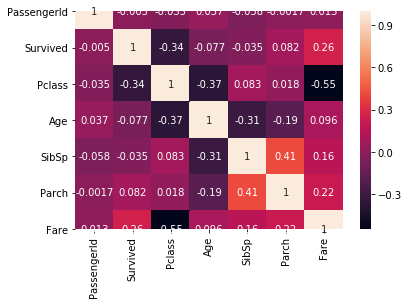

In [80]:
sns.heatmap(tin.corr(), annot=True)

In [16]:
A=tin[['Pclass','Survived']].groupby('Pclass')
A.mean().sort_values(by='Survived', ascending=True)

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [15]:
A.mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


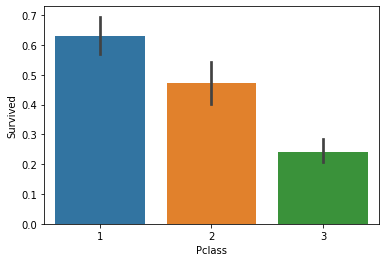

In [27]:
sns.barplot('Pclass','Survived', data=tin)
plt.show()

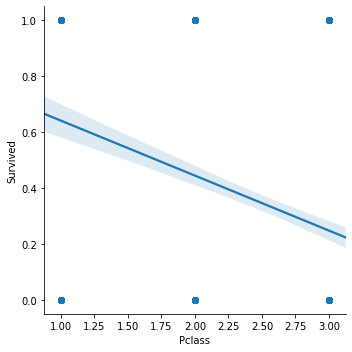

In [36]:
sns.lmplot(x="Pclass", y='Survived', data=tin, palette='dark')

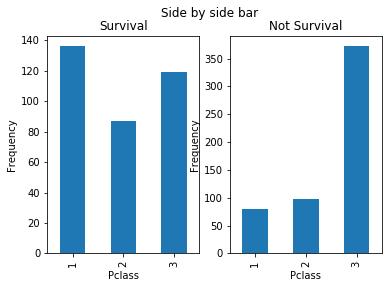

In [74]:

plt.subplot(1,2,1)
tin[tin['Survived']==1]['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title('Survival')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
tin[tin['Survived']==0]['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title('Not Survival')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

plt.suptitle('Side by side bar')
plt.show()

In [18]:
B=tin[['Age', 'Survived']].groupby('Age')
B.mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


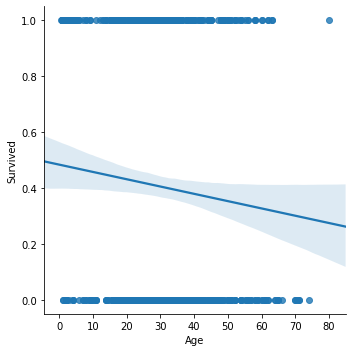

In [35]:
sns.lmplot(x="Age", y='Survived', data=tin, palette='dark')

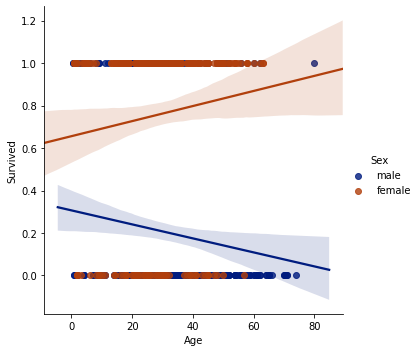

In [39]:
sns.lmplot(x="Age", y='Survived', data=tin, hue='Sex', palette='dark')

In [77]:
bins=[0,10,20,30,40,50,60,70,80]
tin['AgeRange']=pd.cut(tin['Age'],bins)
tin.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
AgeRange       714
dtype: int64

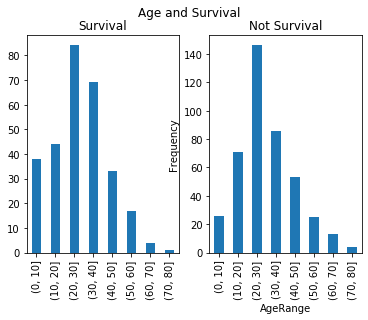

In [78]:
plt.subplot(1,2,1)
tin[tin['Survived']==1]['AgeRange'].value_counts().sort_index().plot(kind='bar')
plt.title('Survival')

plt.subplot(1,2,2)
tin[tin['Survived']==0]['AgeRange'].value_counts().sort_index().plot(kind='bar')
plt.title('Not Survival')
plt.xlabel('AgeRange')
plt.ylabel('Frequency')

plt.suptitle('Age and Survival')
plt.show()

In [62]:
tin['Sex']=tin['Sex'].replace(['female','male'],[1,0])
tin['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

In [64]:
C=tin[['Sex', 'Survived']].groupby('Sex')
C.mean()

,Survived
Sex,
0,0.188908
1,0.742038


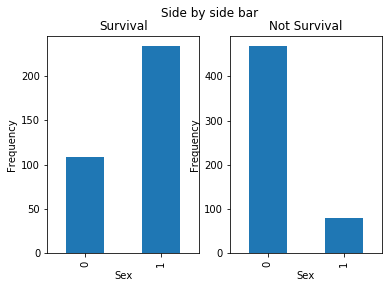

In [75]:
plt.subplot(1,2,1)
tin[tin['Survived']==1]['Sex'].value_counts().sort_index().plot(kind='bar')
plt.title('Survival')
plt.xlabel('Sex')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
tin[tin['Survived']==0]['Sex'].value_counts().sort_index().plot(kind='bar')
plt.title('Not Survival')
plt.xlabel('Sex')
plt.ylabel('Frequency')

plt.suptitle('Side by side bar')
plt.show()

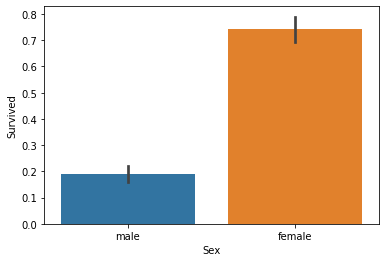

In [28]:
sns.barplot('Sex','Survived',data=tin)
plt.show()